In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D,Dense,Conv2D, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt 
import seaborn as sns

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
base_dir = 'classification_dataset/'

img_height, img_width = 224,224
batch_size = 32

In [3]:
# Defining generators 
train_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,rotation_range=20,
    horizontal_flip=True,
    vertical_flip=False)

valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_gen.flow_from_directory(
    directory=base_dir + 'train',
    target_size=(img_height,img_width),
    batch_size=batch_size, 
    class_mode='categorical')

valid_data = valid_gen.flow_from_directory(
    directory=base_dir + 'valid',
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_data = test_gen.flow_from_directory(
    directory=base_dir + 'test', 
    batch_size=batch_size, 
    target_size=(img_height,img_width),
    class_mode='categorical')

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [5]:
print("Total Categories",train_data.num_classes)

Total Categories 2


In [6]:
class_names = train_data.class_indices.keys()

In [7]:
class_counts = np.bincount(train_data.classes)

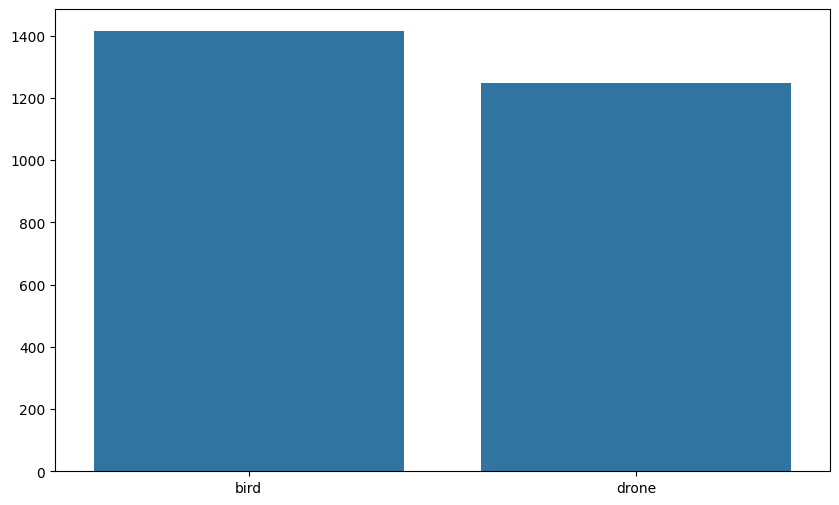

In [8]:
plt.figure(figsize=[10,6])
sns.barplot(x=class_names,y=class_counts)
plt.show()

In [9]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes,activation='softmax')
])

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,114 (42.61 MB)

 Trainable params: 11,169,666 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [13]:
history = model.fit(x=train_data,
                    validation_data=valid_data,
                   epochs=15,
                   callbacks = early_stop)

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6211 - loss: 6.8920 - val_accuracy: 0.5090 - val_loss: 6.9783
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6672 - loss: 0.9131 - val_accuracy: 0.5747 - val_loss: 3.5930
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6972 - loss: 0.7155 - val_accuracy: 0.4638 - val_loss: 1.1013
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6994 - loss: 0.7469 - val_accuracy: 0.6516 - val_loss: 0.9340
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7267 - loss: 0.5506 - val_accuracy: 0.5882 - val_loss: 0.6377
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7357 - loss: 0.5662 - val_accuracy: 0.6629 - val_loss: 1.0876
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7518 - loss: 0.5064 - val_accuracy: 0.7376 - val_loss: 0.5548
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7435 - loss: 0.5158 - val_accuracy: 0.6652 - v

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_data)
y_pred_class = np.argmax(y_pred,axis=1)
test_class = test_data.classes
labels = list(test_data.class_indices.keys())

print("Classification Report :\n",classification_report(test_class,y_pred_class,target_names=labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step
Classification Report :
               precision    recall  f1-score   support

        bird       0.58      0.53      0.55       124
       drone       0.43      0.48      0.45        92

    accuracy                           0.51       216
   macro avg       0.51      0.51      0.50       216
weighted avg       0.52      0.51      0.51       216



In [15]:
train_gen_mobile = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

valid_gen_mobile = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen_mobile = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_data_mobile = train_gen_mobile.flow_from_directory(
    directory=base_dir + 'train',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data_mobile = valid_gen_mobile.flow_from_directory(
    directory=base_dir + 'valid',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_mobile = test_gen_mobile.flow_from_directory(
    directory= base_dir + 'test',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [17]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

In [18]:
base_model.trainable = False

In [19]:
model_mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data_mobile.num_classes, activation='softmax')
])

In [20]:
model_mobile.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history_1 = model_mobile.fit(train_data_mobile,validation_data=valid_data_mobile,epochs=15,callbacks=early_stop)

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 90s 992ms/step - accuracy: 0.8773 - loss: 0.2744 - val_accuracy: 0.9457 - val_loss: 0.1617
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 80s 955ms/step - accuracy: 0.9671 - loss: 0.0756 - val_accuracy: 0.9638 - val_loss: 0.1237
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 78s 927ms/step - accuracy: 0.9834 - loss: 0.0510 - val_accuracy: 0.9774 - val_loss: 0.0912
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9931 - loss: 0.0239 - val_accuracy: 0.9751 - val_loss: 0.1033
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 74s 879ms/step - accuracy: 0.9876 - loss: 0.0324 - val_accuracy: 0.9729 - val_loss: 0.1171
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 72s 857ms/step - accuracy: 0.9877 - loss: 0.0342 - val_accuracy: 0.9661 - val_loss: 0.1359


In [22]:
y_pred_mobile = model_mobile.predict(test_data_mobile)
y_pred_class_mobile = np.argmax(y_pred_mobile,axis=1)
test_class_mobile = test_data_mobile.classes
labels_mobile = list(test_data_mobile.class_indices.keys())

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 725ms/step


In [23]:
print("Classification Report :\n",classification_report(test_class_mobile,y_pred_class_mobile,target_names=labels_mobile))

Classification Report :
               precision    recall  f1-score   support

        bird       0.98      1.00      0.99       124
       drone       1.00      0.98      0.99        92

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



In [24]:
model.save('Custom_CNN.h5')
model_mobile.save('MobileNetV2.h5')

In [25]:
# Lets try with inceptionv3

In [26]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [27]:
train_gen_inc = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_gen_inc = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen_inc = ImageDataGenerator(preprocessing_function = preprocess_input)

In [28]:
train_data_inc = train_gen_inc.flow_from_directory(directory=base_dir + 'train',
                                                  target_size=(299,299),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

valid_data_inc = valid_gen_inc.flow_from_directory(
    directory=base_dir + 'valid',
    target_size=(299,299),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_inc = test_gen_inc.flow_from_directory(
    directory= base_dir + 'test',
    target_size=(299,299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [29]:
base_model_inc = InceptionV3(input_shape=(299,299,3),
                            include_top=False,
                            weights='imagenet')

In [30]:
base_model_inc.trainable = False

In [31]:
model_inc = Sequential([
    base_model_inc,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(train_data_inc.num_classes,activation='softmax')
])

In [32]:
model_inc.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [33]:
model_inc.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,065,314 (84.17 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [34]:
history_inc = model_inc.fit(train_data_inc, 
                           validation_data=valid_data_inc,
                           epochs=15,
                           callbacks=early_stop)

C:\Anaconda3\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7997 - loss: 0.4403 - val_accuracy: 0.9774 - val_loss: 0.0701
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9552 - loss: 0.1129 - val_accuracy: 0.9796 - val_loss: 0.0395
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9797 - loss: 0.0488 - val_accuracy: 0.9751 - val_loss: 0.0479
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9754 - loss: 0.0628 - val_accuracy: 0.9910 - val_loss: 0.0336
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.9845 - loss: 0.0410 - val_accuracy: 0.9842 - val_loss: 0.0303
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9762 - loss: 0.0605 - val_accuracy: 0.9932 - val_loss: 0.0334
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9867 - loss: 0.0379 - val_accuracy: 0.9910 - val_loss: 0.0326
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9706 - v

In [35]:
y_pred_inc = model_inc.predict(test_data_inc)
y_pred_class_inc = np.argmax(y_pred_inc,axis=1)
test_class_inc = test_data_inc.classes
labels_inc = list(test_data_inc.class_indices.keys())

print("Classification Report : \n",classification_report(test_class_inc,y_pred_class_inc,target_names=labels_inc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Classification Report : 
               precision    recall  f1-score   support

        bird       0.98      1.00      0.99       124
       drone       1.00      0.97      0.98        92

    accuracy                           0.99       216
   macro avg       0.99      0.98      0.99       216
weighted avg       0.99      0.99      0.99       216



In [36]:
model_inc.save('InceptionV3.h5')

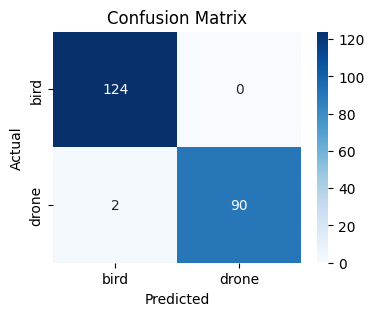

In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
cm = confusion_matrix(test_class_mobile,y_pred_class_mobile)
plt.figure(figsize=[4,3])
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
           xticklabels=labels,
           yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

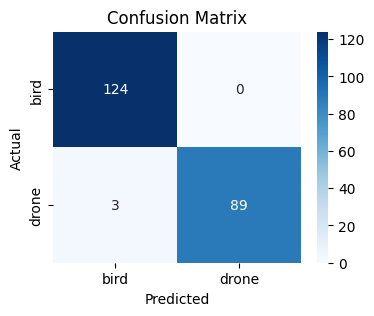

In [38]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
cm = confusion_matrix(test_class_inc,y_pred_class_inc)
plt.figure(figsize=[4,3])
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
           xticklabels=labels,
           yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

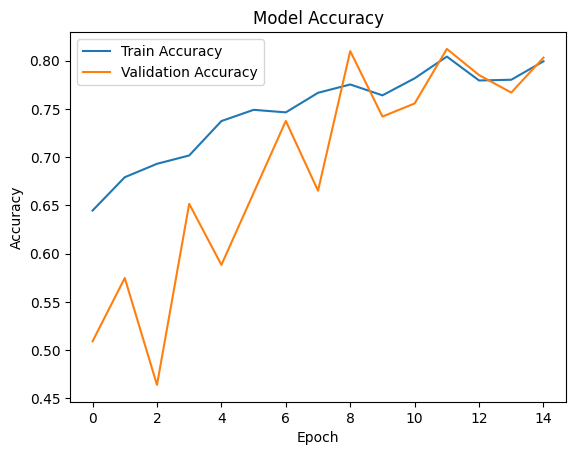

In [39]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

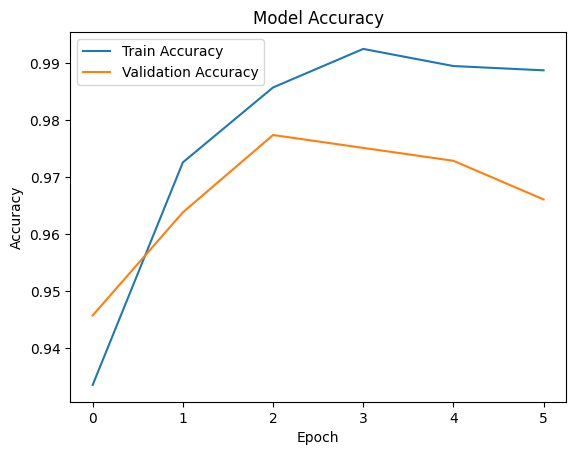

In [40]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

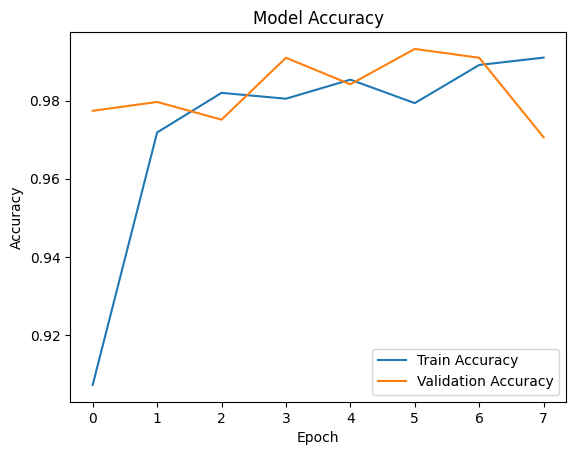

In [41]:
# Accuracy Plot
plt.plot(history_inc.history['accuracy'], label='Train Accuracy')
plt.plot(history_inc.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evaluation Summary 

|Model|Accuracy|Precision|Recall|F1_score|
|-|-|-|-|-|
|InceptionV3|0.99|0.98|1.00|0.99| 
|MobileNetV2|0.99|0.98|1.00|0.99|
|Custom CNN|0.51|0.58|0.53|0.55|